In [1]:
# ANALYSIS:
# 3 trends:
# 1.Temperature Decreases as Distance from the Equator increases.  This is because the distance from the sun increases,
#   because the earth is round.  Take that flat-earthers.

# 2.The maximum average temperature of cities on earth does not appear to be at the equator; instead, the maximum
#   average temperature is found about 20 degrees above the equator.  This is likely due to the tilt of the earths axis,
#   which is about 23.5 degrees.  So, latitudes of 23.5 degrees are closest to the sun during their day time.

# 3. Neither humidity nor wind speed appears to be correlated with latitude. 

In [2]:
# import dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import requests
import random


In [20]:
from citipy import citipy
# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude
# example:
lat_lst=[]
lng_lst=[]
cities=[]
countries=[]

# get 1000 random, non-repeating latitude and longitude combinations
while len(lat_lst)<1001:
    lat=round(random.uniform(-1,1)*90,2)
    if lat not in lat_lst and len(lat_lst)<1001:
        lat_lst.append(lat)      
    lng=round(random.uniform(-1,1)*180, 2)    
    if lng not in lng_lst and len(lng_lst)<1001:
        lng_lst.append(lng)
cities_df=pd.DataFrame({"latitude":lat_lst, "longitude":lng_lst})
cities_df 

for index, rows in cities_df.iterrows():
    city = citipy.nearest_city(rows[0], rows[1])
    city_name=city.city_name
    country=city.country_code
    cities.append(city.city_name)
    countries.append(country)

cities_df["city"]=cities
cities_df["country"]=countries
cities_df.head()

,latitude,longitude,city,country
0,46.77,-51.87,torbay,ca
1,-39.48,157.37,ulladulla,au
2,-33.31,-9.06,jamestown,sh
3,34.40,26.80,palaikastron,gr
4,67.44,-128.54,norman wells,ca


In [4]:
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save a CSV of all retrieved data and a PNG image for each scatter plot.
city_lat=[]
city_lng=[]
temp=[]
humidity=[]
cloudiness=[]
wind_spd=[]
city_id=[]
city=[]
country=[]
nogocity=[]
nogoctry=[]

from config import w_key


for n in range(0,1001):
    try:
        w_url='http://api.openweathermap.org/data/2.5/weather?q='+cities[n]+','+countries[n]+'&units=imperial&appid='+w_key
        response=requests.get(w_url).json()
# TODO: create a line to save a csv of all retrived info 
        city_lng.append(response['coord']['lon'])
        city_lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        city_id.append(response['id'])
        city.append(response['name'])
        country.append(response['sys']['country'])
        print(f'Currently processing City Number: {response["id"]}, City: {cities[n]}, {response["sys"]["country"]}')
    except Exception:
        print(f'unable to get data for {cities[n]}, {countries[n]}')
        nogocity.append(cities[n])
        nogoctry.append(countries[n])


Currently processing City Number: 1521230, City: makinsk, KZ
Currently processing City Number: 2964782, City: dingle, IE
Currently processing City Number: 3833367, City: ushuaia, AR
Currently processing City Number: 964432, City: port alfred, ZA
Currently processing City Number: 3372707, City: ribeira grande, PT
Currently processing City Number: 2206939, City: bluff, NZ
Currently processing City Number: 4005370, City: guadalupe y calvo, MX
Currently processing City Number: 1023309, City: aliwal north, ZA
Currently processing City Number: 3992842, City: petatlan, MX
Currently processing City Number: 2514651, City: los llanos de aridane, ES
Currently processing City Number: 2618795, City: klaksvik, FO
Currently processing City Number: 1506938, City: erzin, RU
Currently processing City Number: 5848280, City: kapaa, US
Currently processing City Number: 1282256, City: hithadhoo, MV
Currently processing City Number: 5919815, City: channel-port aux basques, CA
Currently processing City Number

Currently processing City Number: 3134404, City: tolga, NO
Currently processing City Number: 2035601, City: nenjiang, CN
Currently processing City Number: 3366880, City: hermanus, ZA
Currently processing City Number: 3500957, City: la romana, DO
unable to get data for belushya guba, ru
Currently processing City Number: 1529569, City: changji, CN
Currently processing City Number: 2075265, City: busselton, AU
Currently processing City Number: 777019, City: vardo, NO
Currently processing City Number: 5866583, City: kodiak, US
Currently processing City Number: 2514651, City: los llanos de aridane, ES
unable to get data for illoqqortoormiut, gl
unable to get data for mataura, pf
Currently processing City Number: 3366880, City: hermanus, ZA
Currently processing City Number: 1056899, City: sambava, MG
Currently processing City Number: 2077963, City: albany, AU
unable to get data for taolanaro, mg
Currently processing City Number: 1282256, City: hithadhoo, MV
Currently processing City Number: 

unable to get data for asau, tv
Currently processing City Number: 3923145, City: betanzos, BO
Currently processing City Number: 3445026, City: vila velha, BR
Currently processing City Number: 2686469, City: ornskoldsvik, SE
Currently processing City Number: 1519030, City: shu, KZ
unable to get data for zhuozhou, cn
Currently processing City Number: 2126123, City: chokurdakh, RU
Currently processing City Number: 4031574, City: provideniya, RU
Currently processing City Number: 5866583, City: kodiak, US
Currently processing City Number: 2077963, City: albany, AU
Currently processing City Number: 2075720, City: broome, AU
Currently processing City Number: 4755280, City: danville, US
Currently processing City Number: 5919850, City: chapais, CA
Currently processing City Number: 3573061, City: saint george, BM
Currently processing City Number: 3423146, City: ilulissat, GL
Currently processing City Number: 3115824, City: muros, ES
Currently processing City Number: 2122090, City: pevek, RU
Curr

Currently processing City Number: 2347209, City: bida, NG
Currently processing City Number: 3652764, City: puerto ayora, EC
unable to get data for taolanaro, mg
Currently processing City Number: 3374462, City: mindelo, CV
Currently processing City Number: 964406, City: port shepstone, ZA
Currently processing City Number: 487928, City: novikovo, RU
unable to get data for amderma, ru
Currently processing City Number: 2075265, City: busselton, AU
Currently processing City Number: 2123814, City: leningradskiy, RU
Currently processing City Number: 1622318, City: waingapu, ID
Currently processing City Number: 3115824, City: muros, ES
Currently processing City Number: 3514277, City: yecuatla, MX
Currently processing City Number: 5720495, City: coos bay, US
unable to get data for taolanaro, mg
Currently processing City Number: 3355672, City: luderitz, NA
unable to get data for mys shmidta, ru
unable to get data for taolanaro, mg
Currently processing City Number: 3874787, City: punta arenas, CL

Currently processing City Number: 2511180, City: santa cruz de la palma, ES
Currently processing City Number: 5637146, City: anaconda, US
Currently processing City Number: 3833367, City: ushuaia, AR
Currently processing City Number: 3459094, City: laguna, BR
Currently processing City Number: 2015306, City: tiksi, RU
Currently processing City Number: 3842881, City: nueve de julio, AR
Currently processing City Number: 2074865, City: carnarvon, AU
Currently processing City Number: 2015306, City: tiksi, RU
unable to get data for taolanaro, mg
Currently processing City Number: 3359638, City: walvis bay, NA
Currently processing City Number: 4030556, City: rikitea, PF
Currently processing City Number: 3347353, City: menongue, AO
Currently processing City Number: 2077963, City: albany, AU
Currently processing City Number: 6620339, City: karratha, AU
Currently processing City Number: 1282256, City: hithadhoo, MV
Currently processing City Number: 241131, City: victoria, SC
Currently processing C

Currently processing City Number: 2206939, City: bluff, NZ
Currently processing City Number: 2027042, City: batagay-alyta, RU
Currently processing City Number: 3874787, City: punta arenas, CL
Currently processing City Number: 5367788, City: lompoc, US
Currently processing City Number: 3833367, City: ushuaia, AR
Currently processing City Number: 3366880, City: hermanus, ZA
Currently processing City Number: 3833367, City: ushuaia, AR
unable to get data for taolanaro, mg
Currently processing City Number: 3370903, City: jamestown, SH
Currently processing City Number: 3366880, City: hermanus, ZA
Currently processing City Number: 5367788, City: lompoc, US
Currently processing City Number: 2017155, City: saskylakh, RU
Currently processing City Number: 2127202, City: anadyr, RU
Currently processing City Number: 5848280, City: kapaa, US
Currently processing City Number: 2163355, City: hobart, AU
Currently processing City Number: 6122707, City: rivers, CA
Currently processing City Number: 403055

Currently processing City Number: 2015306, City: tiksi, RU
Currently processing City Number: 2136825, City: isangel, VU
Currently processing City Number: 933288, City: mopipi, BW
Currently processing City Number: 3896218, City: castro, CL
Currently processing City Number: 3369157, City: cape town, ZA
Currently processing City Number: 1803560, City: lingao, CN
unable to get data for bolshoy tsaryn, ru
Currently processing City Number: 3470451, City: barretos, BR
Currently processing City Number: 3874787, City: punta arenas, CL
Currently processing City Number: 5779548, City: payson, US
Currently processing City Number: 3874787, City: punta arenas, CL
unable to get data for samalaeulu, ws
Currently processing City Number: 1507390, City: dikson, RU
Currently processing City Number: 5354943, City: half moon bay, US
unable to get data for karamea, nz
Currently processing City Number: 3366880, City: hermanus, ZA
Currently processing City Number: 4030556, City: rikitea, PF
Currently processin

unable to get data for nizhneyansk, ru
Currently processing City Number: 749778, City: canakkale, TR
Currently processing City Number: 1106677, City: bambous virieux, MU
Currently processing City Number: 610298, City: beyneu, KZ
Currently processing City Number: 5880054, City: barrow, US
Currently processing City Number: 5848280, City: kapaa, US
Currently processing City Number: 3874787, City: punta arenas, CL
Currently processing City Number: 2155415, City: new norfolk, AU
unable to get data for raga, sd
Currently processing City Number: 964432, City: port alfred, ZA
Currently processing City Number: 2139521, City: noumea, NC
Currently processing City Number: 3833367, City: ushuaia, AR
unable to get data for mataura, pf
Currently processing City Number: 2155415, City: new norfolk, AU
Currently processing City Number: 6170031, City: tuktoyaktuk, CA
Currently processing City Number: 4031574, City: provideniya, RU
Currently processing City Number: 508034, City: podporozhye, RU
Currently 

In [5]:
# create DataFrame from API result:
weather_df=pd.DataFrame({"city_id":city_id, "city":city, "country":country,"city_lat":city_lat,"city_lng":city_lng,\
                         "temp":temp, "humidity":humidity,"cloudiness":cloudiness, "wind_speed":wind_spd})
# save dataframe to csv
weather_df.to_csv('weather_API_output.csv')
weather_df.head()


,city_id,city,country,city_lat,city_lng,temp,humidity,cloudiness,wind_speed
0,1521230,Makīnsk,KZ,52.63,70.42,54.27,60,100,9.64
1,2964782,Dingle,IE,52.14,-10.27,62.60,88,40,4.70
2,3833367,Ushuaia,AR,-54.80,-68.30,39.20,80,75,8.05
3,964432,Port Alfred,ZA,-33.59,26.89,57.99,92,65,1.99
4,3372707,Ribeira Grande,PT,38.52,-28.70,68.00,68,40,16.11


In [6]:
# a list of cities that were not able to be retrieved in the API:
nogo_df=pd.DataFrame({'City':nogocity, 'Country':nogoctry})
nogo_df

,City,Country
0,mataura,pf
1,reefton,nz
2,kazalinsk,kz
3,taolanaro,mg
4,barentsburg,sj
...,...,...
119,nizhneyansk,ru
120,raga,sd
121,mataura,pf
122,illoqqortoormiut,gl


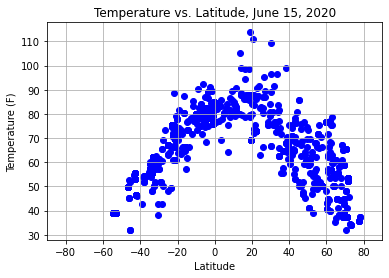

In [7]:
#Create a scatter plot of Temperature vs. Latitude:
plt.xlim(-90,90)
plt.title("Temperature vs. Latitude, June 15, 2020")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(weather_df["city_lat"],weather_df["temp"], color="blue")
plt.show
plt.tight_layout

plt.savefig("Temp_vs_Latitude.png")

# This chart is analyzing how temperature varies with Latitude.  
# It shows that the max temp is not actually at the equator, but instead closer to 20 deg north of it.  There appears
# to be a strong correlation of temperature and latitude.  This makes sense as the distance from the sun increases with 
# latitude. The earth's tilt is also evident in that the peak temperature seems to occur about 20 deg lat above the equator.

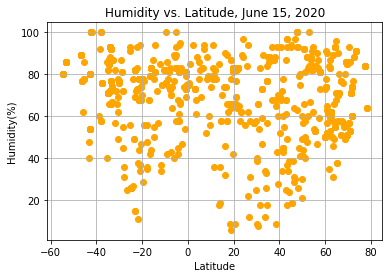

In [8]:
#Create a scatter plot of Humidity (%) vs. Latitude
plt.title("Humidity vs. Latitude, June 15, 2020")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(weather_df["city_lat"],weather_df["humidity"], color="orange")
plt.show
plt.tight_layout

plt.savefig("Humidity_vs_Latitude.png")

# This plot is looking at trends between latitude and humidity.  It appears that there is less variability of
# humidity as you get closer to the equator. It is more likely that this is a secondary trend due to increasing temperature
# near the equator, as a rise in temperature increases water vapor content (e.g. humidity).

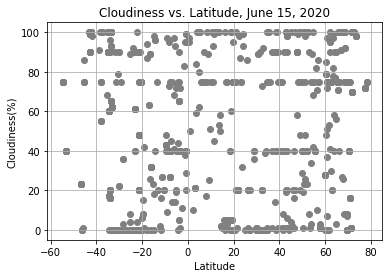

In [9]:
#Create a scatter plot of Cloudiness (%) vs. Latitude
plt.title("Cloudiness vs. Latitude, June 15, 2020")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(weather_df["city_lat"],weather_df["cloudiness"], color="gray")
plt.show
plt.tight_layout

plt.savefig("Cloudiness_vs_Latitude.png")

# This plot analyzes cloudiness vs latitide.  There appears to be little to no correlation here.

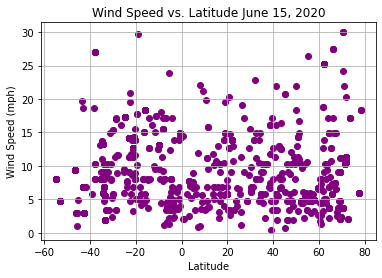

In [10]:
#Create a scatter plot of Wind Speed (mph) vs. Latitude
plt.title("Wind Speed vs. Latitude June 15, 2020")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(weather_df["city_lat"],weather_df["wind_speed"], color="purple")
plt.show
plt.tight_layout

plt.savefig("Wind_spd_vs_Latitude.png")

# This plot is analyzing if/how wind speed varies with latitude.  There appears to be a weak positive correlation between
# these two variables, but this may be due to outliar data, and requires further investigation.

In [11]:
# Separate the latitude data into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
N_Hem_df=weather_df.loc[weather_df["city_lat"]>=0]
S_Hem_df=weather_df.loc[weather_df["city_lat"]<0]

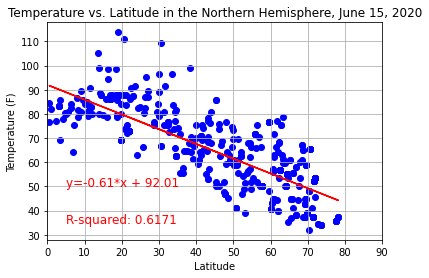

In [12]:
# Your second requirement is to run linear regression on each relationship, 
# * Northern Hemisphere - Temperature (F) vs. Latitude
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

plt.xlim(0,90)
plt.title("Temperature vs. Latitude in the Northern Hemisphere, June 15, 2020")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(N_Hem_df["city_lat"],N_Hem_df["temp"], color="blue")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(N_Hem_df["city_lat"],N_Hem_df["temp"])
regress_values=N_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(5,50), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(5,35), fontsize="large", color="red")
plt.plot(N_Hem_df["city_lat"],regress_values,"r-")

plt.show
plt.savefig("N.Hem_Temp_vs_Latitude.png")

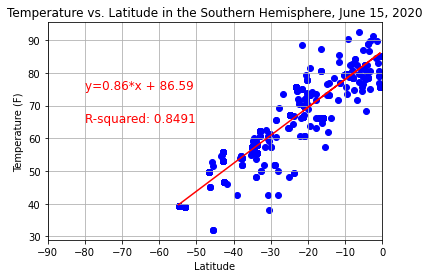

In [13]:
# * Southern Hemisphere - Temperature (F) vs. Latitudeplt.xlim(0,90)
plt.xlim(-90,0)
plt.title("Temperature vs. Latitude in the Southern Hemisphere, June 15, 2020")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(S_Hem_df["city_lat"],S_Hem_df["temp"], color="blue")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(S_Hem_df["city_lat"],S_Hem_df["temp"])
regress_values=S_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(-80,75), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(-80,65), fontsize="large", color="red")
plt.plot(S_Hem_df["city_lat"],regress_values,"r-")

plt.savefig("S.Hem_Temp_vs_Latitude.png")

#There appears to be a moderate negative correlation between latitude and temperature in the Northern Hemisphere.
# There appears to be a strong positive correlation between latitude and temperature in the Southern Hemisphere.
# Overall, this shows that generally temperature increases the closer you are to the equator.
# The differences in slope of the regression lines appears to show that temperature in the northern hemisphere drops more slowly
# with increasing distance from the equator than temperature in the southern hemisphere does. However I think this 
# appearance is due to the way we have selected our two datasets by hemisphere.  
# The temperature appears to peak at a latitude equal to the tilt of the earths axis (about 23 degrees). 
# Had we separated the data into two sets above and below this point, rather than the equator, I am betting that the 
# trend in change in temp with change in latitude would be more equal on the south and north sides of that latitude.

# There appear to be more cities in the northern hemisphere than in the Southern hemisphere. The Northern hemisphere also
# appears to be populated up to 80 degrees of latitude, whereas the Southern Hemisphere does not appear to be populated
# below -55 degrees latitude. These trends both make sense when you look at the concentration of land mass vs. ocean on earth
# relative to latitudinal position.

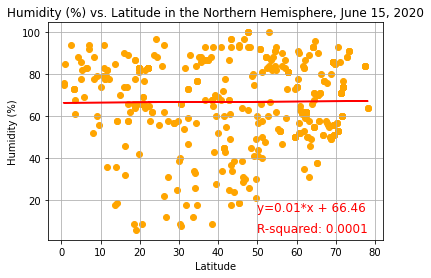

In [14]:
# * Northern Hemisphere - Humidity (%) vs. Latitude

plt.title("Humidity (%) vs. Latitude in the Northern Hemisphere, June 15, 2020")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(N_Hem_df["city_lat"],N_Hem_df["humidity"], color="orange")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(N_Hem_df["city_lat"],N_Hem_df["humidity"])
regress_values=N_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(50,15), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(50,5), fontsize="large", color="red")
plt.plot(N_Hem_df["city_lat"],regress_values,"r-")

plt.show

plt.savefig("N.Hem_Humidity_vs_Latitude.png")
# todo code to sve .png image
# After each pair of plots explain what the linear regression is modeling such as any relationships you notice 
# and any other analysis you may have.

# **Optional** You will be creating multiple linear regression plots. To optimize your code, 
# write a function that creates the linear regression plots.

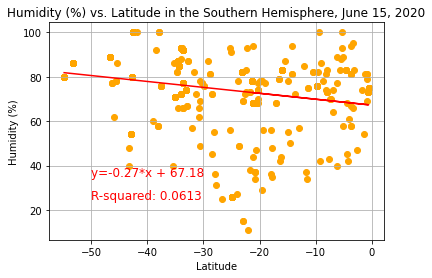

In [15]:
# * Southern Hemisphere - Humidity (%) vs. Latitude
plt.title("Humidity (%) vs. Latitude in the Southern Hemisphere, June 15, 2020")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(S_Hem_df["city_lat"],S_Hem_df["humidity"], color="orange")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(S_Hem_df["city_lat"],S_Hem_df["humidity"])
regress_values=S_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(-50,35), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(-50,25), fontsize="large", color="red")
plt.plot(S_Hem_df["city_lat"],regress_values,"r-")

plt.savefig("S.Hem_Humidity_vs_Latitude.png")

# Based on the regressions there is no correlation between humidity and latitude in either hemisphere.

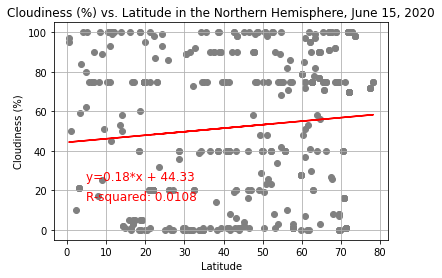

In [16]:
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
plt.title("Cloudiness (%) vs. Latitude in the Northern Hemisphere, June 15, 2020")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(N_Hem_df["city_lat"],N_Hem_df["cloudiness"], color="gray")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(N_Hem_df["city_lat"],N_Hem_df["cloudiness"])
regress_values=N_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(5,25), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(5,15), fontsize="large", color="red")
plt.plot(N_Hem_df["city_lat"],regress_values,"r-")

plt.show
plt.savefig("N.Hem_Cloudiness_vs_Latitude.png")

# todo code to sve .png image
# After each pair of plots explain what the linear regression is modeling such as any relationships you notice 
# and any other analysis you may have.

# **Optional** You will be creating multiple linear regression plots. To optimize your code, 
# write a function that creates the linear regression plots.


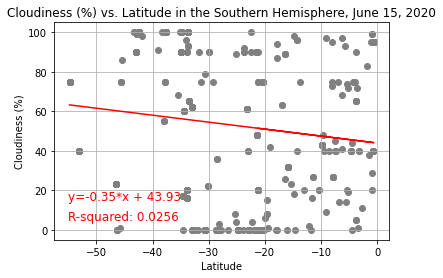

In [17]:
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
plt.title("Cloudiness (%) vs. Latitude in the Southern Hemisphere, June 15, 2020")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(S_Hem_df["city_lat"],S_Hem_df["cloudiness"], color="gray")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(S_Hem_df["city_lat"],S_Hem_df["cloudiness"])
regress_values=S_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(-55,15), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(-55,5), fontsize="large", color="red")
plt.plot(S_Hem_df["city_lat"],regress_values,"r-")

plt.savefig("S.Hem_Cloudiness_vs_Latitude.png")
# There appears to be no correlation between latitude and cloudiness.

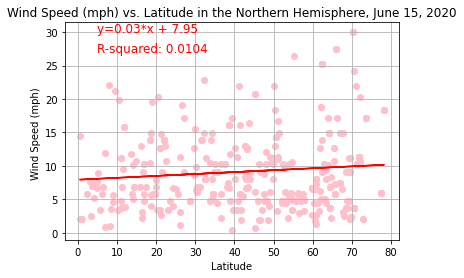

In [18]:
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
plt.title("Wind Speed (mph) vs. Latitude in the Northern Hemisphere, June 15, 2020")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(N_Hem_df["city_lat"],N_Hem_df["wind_speed"], color="pink")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(N_Hem_df["city_lat"],N_Hem_df["wind_speed"])
regress_values=N_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(5,30), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(5,27), fontsize="large", color="red")
plt.plot(N_Hem_df["city_lat"],regress_values,"r-")

plt.show

plt.savefig("N.Hem_Wind_speed_vs_Latitude.png")

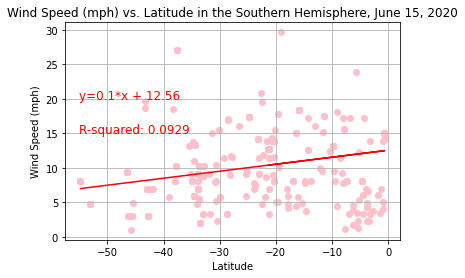

In [19]:
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude
plt.title("Wind Speed (mph) vs. Latitude in the Southern Hemisphere, June 15, 2020")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True) 
plt.scatter(S_Hem_df["city_lat"],S_Hem_df["wind_speed"], color="pink")
plt.show
plt.tight_layout
(slope, intercept, rvalue, pvalue, stderr)=linregress(S_Hem_df["city_lat"],S_Hem_df["wind_speed"])
regress_values=S_Hem_df["city_lat"]*slope+intercept
lineq="y="+str(round(slope,2))+"*x + "+ str(round(intercept, 2))
plt.annotate(lineq,(-55,20), fontsize="large", color="red")
r_squared= rvalue**2
plt.annotate((f'R-squared: {round(r_squared,4)}'),(-55,15), fontsize="large", color="red")
plt.plot(S_Hem_df["city_lat"],regress_values,"r-")

plt.savefig("S.Hem_Wind_speed_vs_Latitude.png")

# wind speed and latitude have no correlation.